In [1]:
# project: p6
# submitter: achandrashe4
# partner: none
# hours: 13

In [2]:
import time, random
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import r2_score
from zipfile import ZipFile
import io, re
from matplotlib.colors import ListedColormap
from matplotlib.animation import FuncAnimation
from IPython.core.display import HTML

In [3]:
connection = sqlite3.connect("data/images.db")
df = pd.read_sql("""
SELECT file_name, district_name, lon, lat, water_ratio, forest_ratio, agriculture_ratio, developed_ratio
FROM sample INNER JOIN districts 
ON sample.district_id = districts.district_id
LIMIT 400
""", connection)

train, test = train_test_split(df, random_state=0)

In [4]:
with ZipFile("data/images.zip") as zf:
    for file_name in zf.infolist()[400:]:
        with zf.open(file_name) as f:
            buf = io.BytesIO(f.read())
            map_array = np.load(buf)

In [5]:
def get_usage_colormap():
    use_cmap = np.zeros(shape=(256,4))
    use_cmap[:,-1] = 1
    uses = np.array([
        [0, 0.00000000000, 0.00000000000, 0.00000000000],
        [11, 0.27843137255, 0.41960784314, 0.62745098039],
        [12, 0.81960784314, 0.86666666667, 0.97647058824],
        [21, 0.86666666667, 0.78823529412, 0.78823529412],
        [22, 0.84705882353, 0.57647058824, 0.50980392157],
        [23, 0.92941176471, 0.00000000000, 0.00000000000],
        [24, 0.66666666667, 0.00000000000, 0.00000000000],
        [31, 0.69803921569, 0.67843137255, 0.63921568628],
        [41, 0.40784313726, 0.66666666667, 0.38823529412],
        [42, 0.10980392157, 0.38823529412, 0.18823529412],
        [43, 0.70980392157, 0.78823529412, 0.55686274510],
        [51, 0.64705882353, 0.54901960784, 0.18823529412],
        [52, 0.80000000000, 0.72941176471, 0.48627450980],
        [71, 0.88627450980, 0.88627450980, 0.75686274510],
        [72, 0.78823529412, 0.78823529412, 0.46666666667],
        [73, 0.60000000000, 0.75686274510, 0.27843137255],
        [74, 0.46666666667, 0.67843137255, 0.57647058824],
        [81, 0.85882352941, 0.84705882353, 0.23921568628],
        [82, 0.66666666667, 0.43921568628, 0.15686274510],
        [90, 0.72941176471, 0.84705882353, 0.91764705882],
        [95, 0.43921568628, 0.63921568628, 0.72941176471],
    ])
    for row in uses:
        use_cmap[int(row[0]),:-1] = row[1:]
    return ListedColormap(use_cmap)

In [6]:
# Q1: What are the last 5 rows of the test dataset?
last_five = test.iloc[-5:]
last_five

,file_name,district_name,lon,lat,water_ratio,forest_ratio,agriculture_ratio,developed_ratio
146,area0146.npy,district 08,-87.869312,44.365150,0.0048,0.0249,0.8343,0.0896
135,area0135.npy,district 06,-87.852985,43.935362,0.0030,0.0463,0.8241,0.0697
390,area0390.npy,district 01,-88.908064,42.562049,0.0000,0.1818,0.6871,0.0763
264,area0264.npy,district 01,-87.842951,42.704875,0.0030,0.0376,0.0423,0.8906
364,area0364.npy,district 01,-87.987364,42.754155,0.0025,0.0498,0.8408,0.0689


<AxesSubplot:xlabel='lon', ylabel='developed_ratio'>

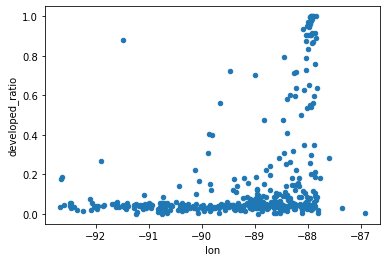

In [7]:
# Q2: What is the relationship between developed_ratio and lon [PLOT]
df.plot(x = "lon", y = "developed_ratio", kind = 'scatter')	

In [8]:
# Q3: What are the developed_ratio predictions of a Linear model on the first 5 test points?
lr = LinearRegression()
lr.fit(train[["lat", "lon", "water_ratio", "forest_ratio", "agriculture_ratio"]], train["developed_ratio"])
train_df = test.copy()
train_df["predicted"] = lr.predict(train_df[["lat", "lon", "water_ratio", "forest_ratio", "agriculture_ratio"]])
train_df[:5]

,file_name,district_name,lon,lat,water_ratio,forest_ratio,agriculture_ratio,developed_ratio,predicted
132,area0132.npy,district 06,-87.940213,43.750300,0.0058,0.0266,0.5506,0.2990,0.187514
309,area0309.npy,district 07,-91.854009,45.352143,0.0002,0.1366,0.8074,0.0401,-0.155128
341,area0341.npy,district 01,-88.294035,42.656175,0.0010,0.3283,0.2029,0.1805,0.376093
196,area0196.npy,district 06,-89.557249,44.187877,0.0000,0.0836,0.8079,0.0412,-0.054414
246,area0246.npy,district 05,-88.596203,43.159942,0.0002,0.0201,0.6677,0.0921,0.188176


In [9]:
# Q4: How does the model score when evaluated against the test dataset?
lr.score(test[["lat", "lon", "water_ratio", "forest_ratio", "agriculture_ratio"]], train_df["developed_ratio"])

0.7138077753811825

Text(0, 0.5, 'predicted developed_ratio')

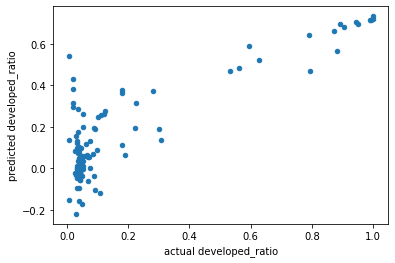

In [10]:
# Q5: How do the predictions compare to the actual values? [PLOT]
ax = train_df.plot(xlabel = "hello", x = "developed_ratio", y = "predicted", kind = 'scatter')
ax.set_xlabel("actual developed_ratio")
ax.set_ylabel("predicted developed_ratio")

<AxesSubplot:>

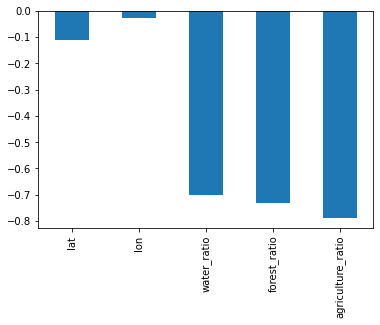

In [11]:
# Q6: What are the coefficients for each feature in your model? [PLOT]
coef_plot = pd.Series(lr.coef_, index = ["lat", "lon", "water_ratio", "forest_ratio", "agriculture_ratio"])
coef_plot.plot.bar()

In [12]:
# Q7: Can we beat our simple model's score of 0.756 with a more complicated model?
l2 = Pipeline([
    ("both", make_column_transformer((PolynomialFeatures(degree = 2, include_bias = False), ["water_ratio", "forest_ratio", "agriculture_ratio"]),
                                     (OneHotEncoder(), ["district_name"]),
                                     remainder = "passthrough")),
    ("lr", LinearRegression())
])
l2.fit(train[["district_name", "lat", "lon", "water_ratio", "forest_ratio", "agriculture_ratio"]], train["developed_ratio"])
l2.score(test[["district_name", "lat", "lon", "water_ratio", "forest_ratio", "agriculture_ratio"]], test["developed_ratio"])

0.8420970788505482

In [13]:
# Q8: what are the mean (average) scores for simple and complex models, respectively?
simple = cross_val_score(lr, train[["lat", "lon", "water_ratio", "forest_ratio", "agriculture_ratio"]], train["developed_ratio"], cv = 8)
comp = cross_val_score(l2, train[["district_name", "lat", "lon", "water_ratio", "forest_ratio", "agriculture_ratio"]], train["developed_ratio"], cv = 8)
mean_scores = (simple.mean(), comp.mean())
mean_scores

(0.6517545836308132, 0.7882683505969756)

In [14]:
# Q9: what is the standard deviation of scores for each model?
sd_scores = (simple.std(), comp.std())
sd_scores

(0.11307460959365212, 0.0666752521147788)

In [15]:
# Q10: How many cells in all of area1234.npy contain code 52?
with ZipFile("data/images.zip") as zf:
    with zf.open("area1234.npy") as f:
        buf = io.BytesIO(f.read())
        npy_1234 = np.load(buf)
        
(npy_1234 == 52).astype(int).sum()

80

In [16]:
# Q11: What are the last 5 rows of the new test dataset?
df2 = pd.read_sql("""
SELECT file_name, district_name, lon, lat, water_ratio, forest_ratio, agriculture_ratio, developed_ratio
FROM sample INNER JOIN districts 
ON sample.district_id = districts.district_id
""", connection)

train2, test2 = train_test_split(df2, random_state=0)
test2.iloc[-5:]

,file_name,district_name,lon,lat,water_ratio,forest_ratio,agriculture_ratio,developed_ratio
936,area0936.npy,district 03,-92.152574,44.502114,NaN,NaN,NaN,NaN
1524,area1524.npy,district 02,-90.151901,43.211515,NaN,NaN,NaN,NaN
1415,area1415.npy,district 05,-88.921017,43.197963,NaN,NaN,NaN,NaN
1223,area1223.npy,district 04,-87.906383,43.074510,NaN,NaN,NaN,NaN
1548,area1548.npy,district 03,-90.359220,43.570773,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Madison 2016')

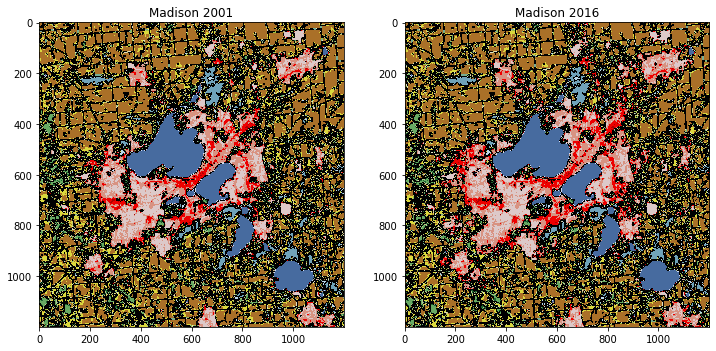

In [17]:
with ZipFile("data/madison.zip") as zf:
    with zf.open("year-2001.npy") as f:
        buf = io.BytesIO(f.read())
        mad2001 = np.load(buf)
    with zf.open("year-2016.npy") as f:
        buf = io.BytesIO(f.read())
        mad2016 = np.load(buf)

fig, axes = plt.subplots(ncols=2, figsize=(12,6))
axes[0].imshow(mad2001, vmin=0, vmax=255, cmap=get_usage_colormap())
axes[0].set_title("Madison 2001")
axes[1].imshow(mad2016, vmin=0, vmax=255, cmap=get_usage_colormap())
axes[1].set_title("Madison 2016")

In [18]:
# Q13: What is the shape of the 2001 Madison matrix
mad2001.shape

(1200, 1200)

In [19]:
# Q14: What portion of the points in Madison changed from 2001 to 2016?
(mad2001 != mad2016).astype(int).mean()

0.06156458333333333

In [20]:
# Q15: What years appear in madison.zip?
years = []
with ZipFile("data/madison.zip") as zf:
    for file_name in zf.infolist():
        file_name = str(file_name)
        year = re.findall('(\d{4})', file_name)
        years.append(year[0])
        
years = [int(i) for i in years]
years

[2001, 2004, 2006, 2008, 2011, 2013, 2016]

In [21]:
# Q16: How has Madison evolved over the years? [VIDEO]
fig, axes = plt.subplots(ncols=1, figsize=(12,6))
axes.imshow(mad2001, vmin=0, vmax=255, cmap=get_usage_colormap())

t = ax.text(0.5, 0.5, "", size = 72, va="center", ha="center")

def draw_frame(frame_num):
    for i in range(frame_num + 1):
        axes.set_title("Madison " + str(years[i]))
        t.set_text(str(frame_num))
    
anim = FuncAnimation(fig, draw_frame, 7, interval=1000)
html = anim.to_html5_video()
plt.close()
HTML(html)